In [39]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import sys
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import normaltest

## 4.1.1 Dimensão e sumário dos dados

In [40]:
try:
    df = pd.read_csv('../AIRPOL_data.csv' , sep=';')
except Exception as e:
    print("Erro ao ler o arquivo:", e)
    import sys; sys.exit(1)

#### Dimensão do dataset (número de linhas e colunas)

In [41]:
print("Dimensão do dataset (linhas x colunas):")
print(df.shape)

Dimensão do dataset (linhas x colunas):
(49140, 8)


#### Informações sobre os dados (tipos e valores nulos)

In [ ]:
print("\nInformações sobre os dados:")
print(df.info())


Informações sobre os dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49140 entries, 0 to 49139
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Country                       49140 non-null  object
 1   NUTS_Code                     49140 non-null  object
 2   Air_Pollutant                 49140 non-null  object
 3   Outcome                       49140 non-null  object
 4   Affected_Population           49140 non-null  object
 5   Populated_Area[km2]           49140 non-null  object
 6   Air_Pollution_Average[ug/m3]  49140 non-null  object
 7   Value                         49140 non-null  object
dtypes: object(8)
memory usage: 3.0+ MB
None


#### Estatísticas descritivas (média, desvio padrão, etc.)

In [ ]:
print("\nEstatísticas descritivas:")
print(df.describe())


Estatísticas descritivas:
        Country NUTS_Code Air_Pollutant Outcome Affected_Population  \
count     49140     49140         49140   49140               49140   
unique       42      1755             3       6                4863   
top     Germany        BA         PM2.5  Asthma          1072811,00   
freq      13224       116         29682   10254                  92   

       Populated_Area[km2] Air_Pollution_Average[ug/m3]  Value  
count                49140                        49140  49140  
unique                1789                          570   2711  
top                  56,80                         8,50   0,00  
freq                   116                          999   7889  


#### Valores NaN por coluna

In [ ]:
print("\nValores NaN por coluna:")
print(df.isna().sum())


Valores NaN por coluna:
Country                         0
NUTS_Code                       0
Air_Pollutant                   0
Outcome                         0
Affected_Population             0
Populated_Area[km2]             0
Air_Pollution_Average[ug/m3]    0
Value                           0
dtype: int64


## 4.1.2 Exploração dos dados através de gráficos

In [26]:
sys.path.append(os.path.abspath('..'))
from processamento import df

In [27]:
def hist_plot_and_normality_check(column_name):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column_name].dropna(), kde=True, color='blue', bins=30)
    
    plt.title(f'Histograma de {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequência')
    plt.tight_layout()
    plt.show()

    # Teste de normalidade de D'Agostino e Pearson
    stat, p_value = normaltest(df[column_name].dropna())
    print(f'Teste de normalidade para {column_name}: Estatística={stat:.3f}, p-valor={p_value:.3f}')

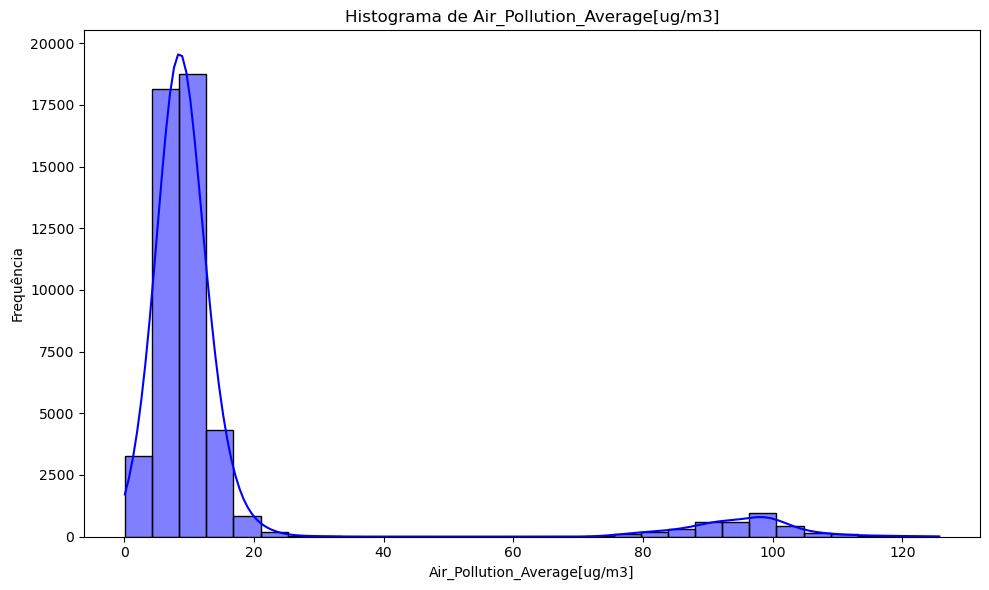

Teste de normalidade para Air_Pollution_Average[ug/m3]: Estatística=31904.904, p-valor=0.000


In [28]:
hist_plot_and_normality_check('Air_Pollution_Average[ug/m3]')

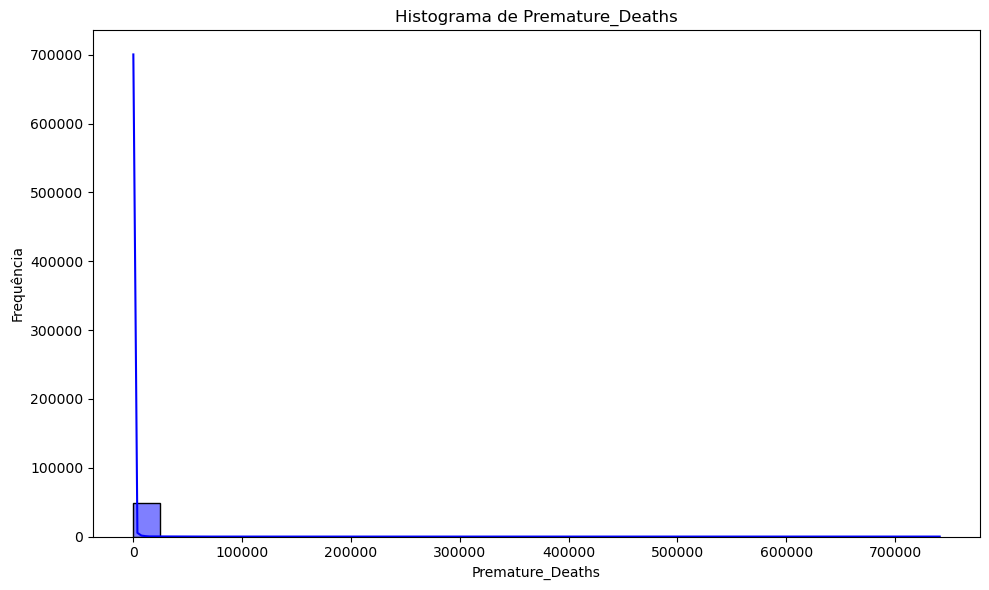

Teste de normalidade para Premature_Deaths: Estatística=187777.171, p-valor=0.000


In [29]:
hist_plot_and_normality_check('Premature_Deaths')

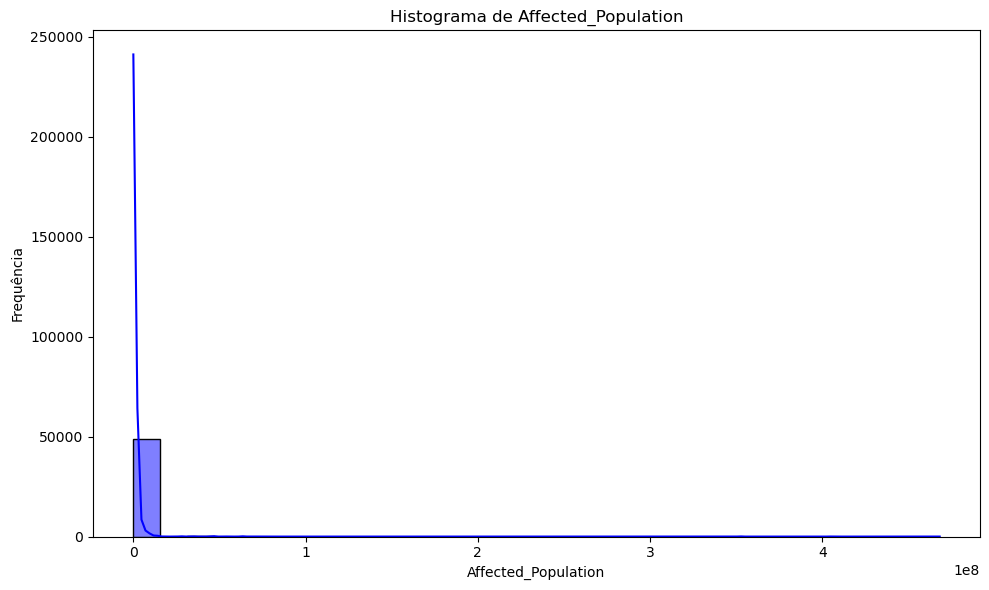

Teste de normalidade para Affected_Population: Estatística=140462.506, p-valor=0.000


In [30]:
hist_plot_and_normality_check('Affected_Population')

#### Poluição média por região

In [31]:
def avg_air_pollution_by_region():
    region_avg = df.groupby('Region')['Air_Pollution_Average[ug/m3]'].mean().reset_index()

    plt.figure(figsize=(10, 6))
    sns.barplot(data=region_avg, x='Air_Pollution_Average[ug/m3]', y='Region', palette='coolwarm')

    plt.title('Média de Poluição do Ar por Região')
    plt.xlabel('Poluição Média [µg/m³]')
    plt.ylabel('Região')
    plt.tight_layout()
    plt.show()

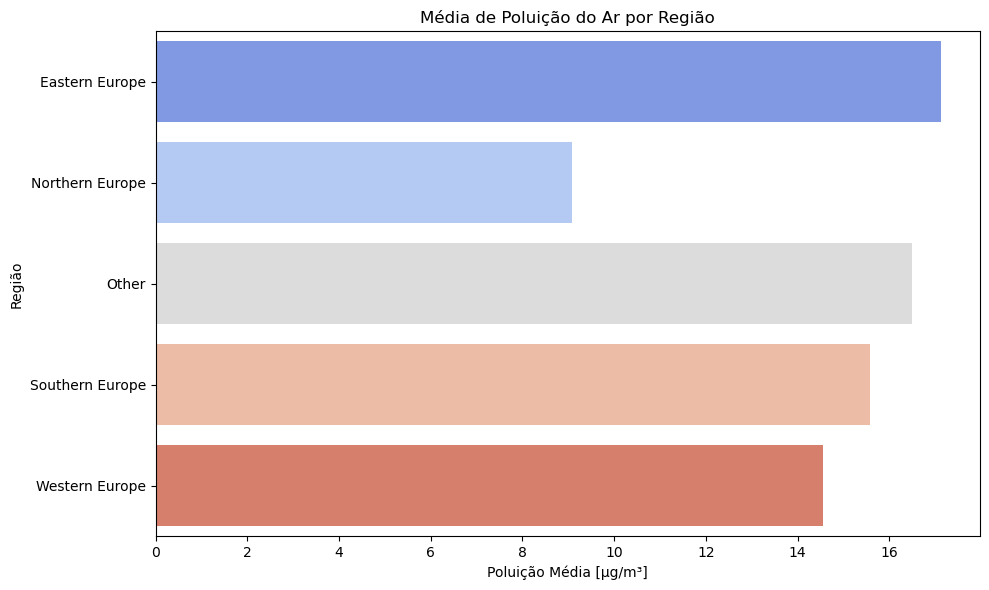

In [32]:
avg_air_pollution_by_region()

#### Poluição por poluente e região

In [33]:
def avg_air_pollution_by_pollutant_and_region():
    res = df.groupby(['Region', 'Air_Pollutant'])['Air_Pollution_Average[ug/m3]'].mean().reset_index()

    plt.figure(figsize=(12, 7))
    sns.barplot(data=res, x='Air_Pollution_Average[ug/m3]', y='Region', hue='Air_Pollutant', palette='coolwarm')

    plt.title('Poluição Média por Poluente e Região')
    plt.xlabel('Poluição Média [µg/m³]')
    plt.ylabel('Região')
    plt.legend(title='Poluente')
    plt.tight_layout()
    plt.show()


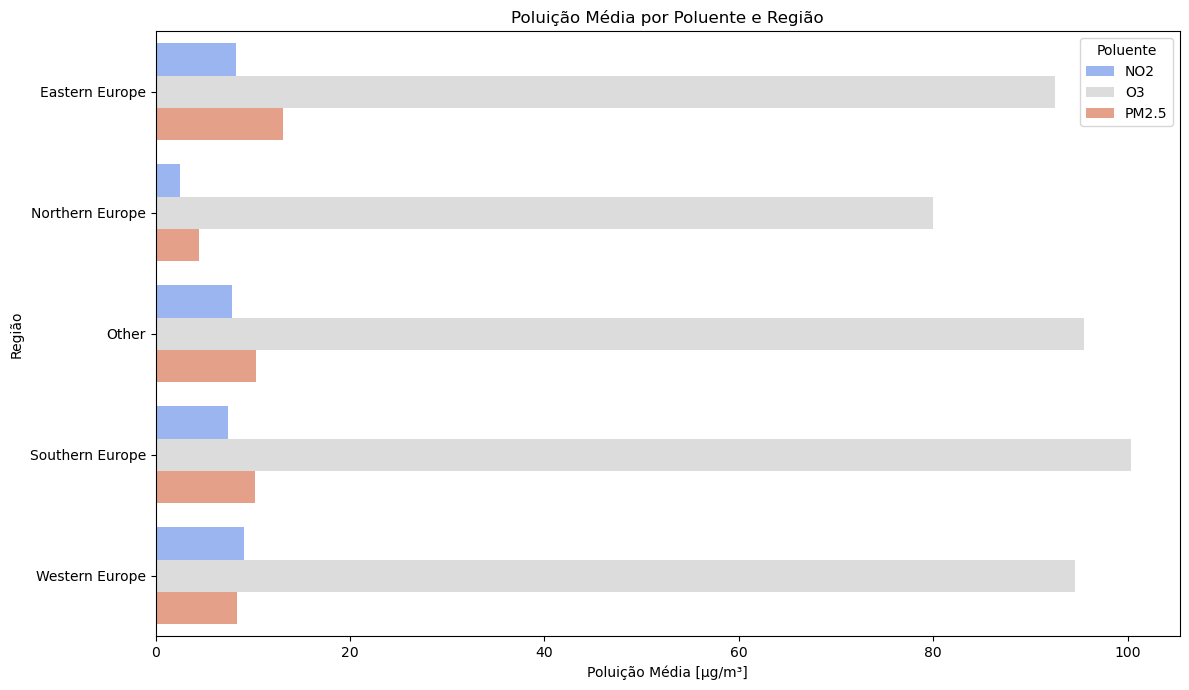

In [34]:
avg_air_pollution_by_pollutant_and_region()

#### Total de mortes prematuras por região

In [35]:
def total_premature_deaths_by_region():
    total_deaths = df.groupby('Region')['Premature_Deaths'].sum().reset_index()

    plt.figure(figsize=(10, 6))
    sns.barplot(data=total_deaths, x='Premature_Deaths', y='Region', palette='coolwarm')

    plt.title('Total de Mortes Prematuras por Região')
    plt.xlabel('Mortes Prematuras')
    plt.ylabel('Região')
    plt.tight_layout()
    plt.show()

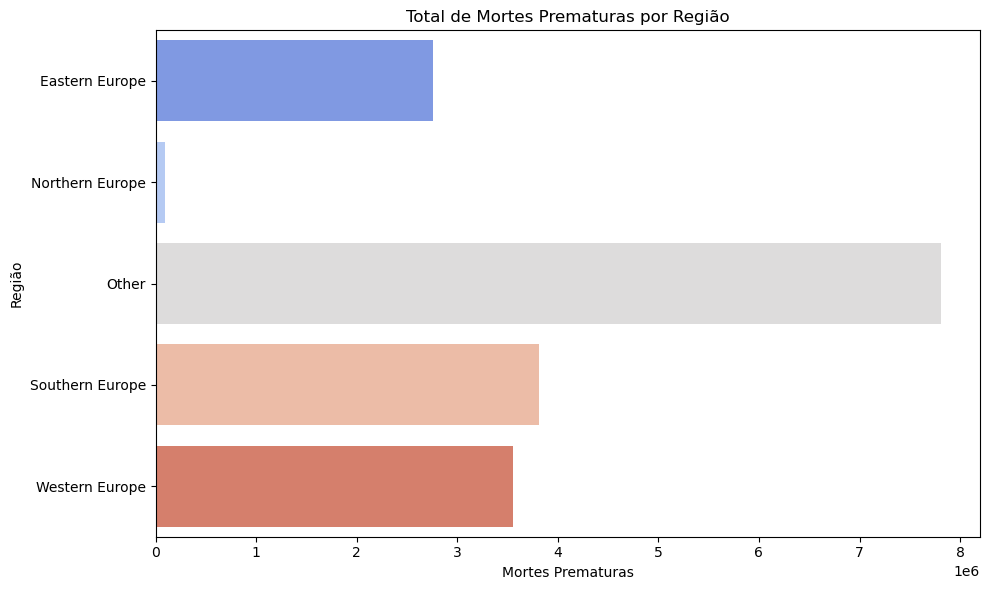

In [36]:
total_premature_deaths_by_region()

#### Análise de correlação com mortes prematuras por região

In [37]:
def plot_deaths_correlation(region):
    df_region = df[df['Region'] == region]
    numeric_df = df_region.select_dtypes(include='number')
    
    corr = numeric_df.corr()[['Premature_Deaths']].drop('Premature_Deaths')
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlação com Premature_Deaths em {region}')
    plt.tight_layout()
    plt.show()

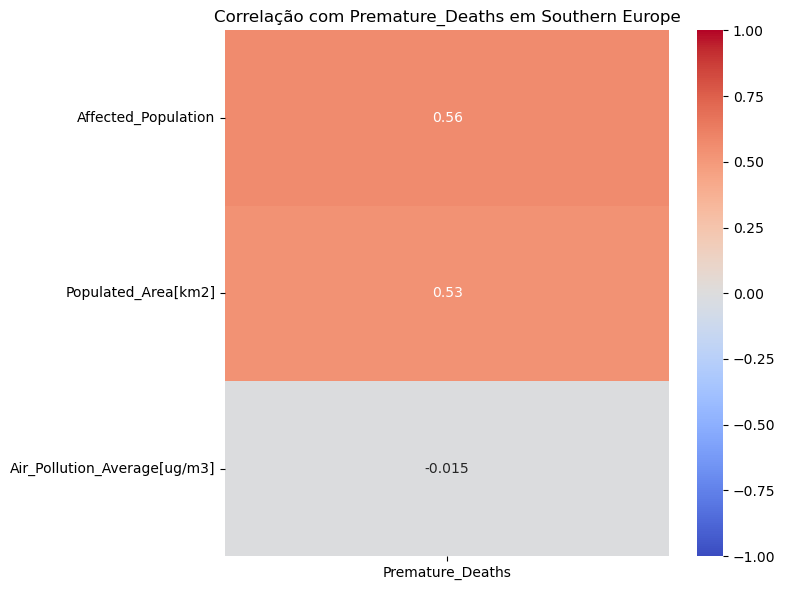

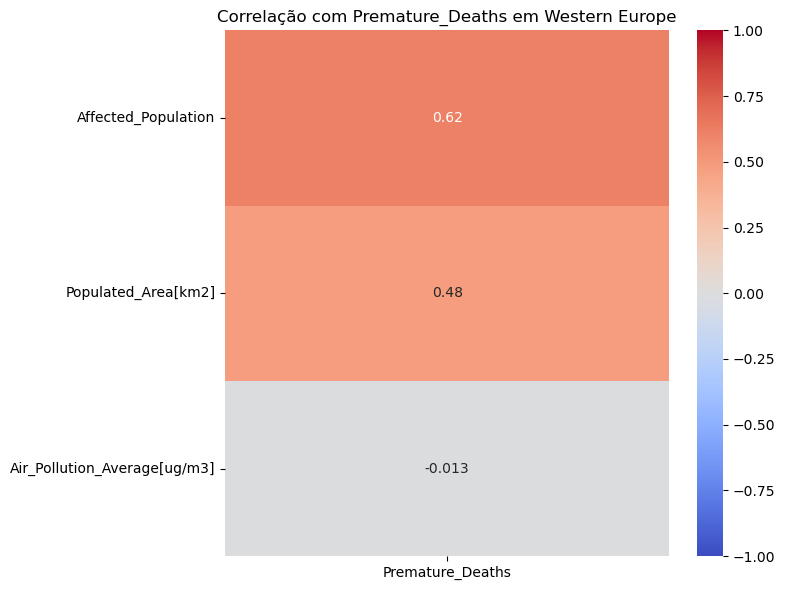

In [38]:
plot_deaths_correlation('Southern Europe')
plot_deaths_correlation('Western Europe')

## 4.1.3 Pré-processamento dos dados
## 4.1.4 Agrupamento de países em regiões

#### Ambas as alíneas foram desenvolvidas no ficheiro 'processamento.py', para poder ser importado noutros ficheiros e evitar a repetição de código.